# Dogs VS Cats data training Using CNN

In [1]:
import os, shutil

origin_dir = "C:/Users/Gene/Desktop/projects/keras_tutorial/datasets/dogs-vs-cats/train"

base_dir = "C:/Users/Gene/Desktop/projects/keras_tutorial/datasets/dogs_cats"
#os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(origin_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
print('# of Cat images to Train : ', len(os.listdir(train_cats_dir)))
print('# of Dog images to Train : ', len(os.listdir(train_dogs_dir)))
print('# of Cat images to Validation : ', len(os.listdir(validation_cats_dir)))
print('# of Dog images to Validation : ', len(os.listdir(validation_dogs_dir)))
print('# of Cat images to Test : ', len(os.listdir(test_cats_dir)))
print('# of Dog images to Test : ', len(os.listdir(test_dogs_dir)))

# of Cat images to Train :  1000
# of Dog images to Train :  1000
# of Cat images to Validation :  500
# of Dog images to Validation :  500
# of Cat images to Test :  500
# of Dog images to Test :  500


In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

c:\users\gene\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

for data_batch, labels_batch in train_generator:
    print("size of data batch : ", data_batch.shape)
    print("size of labels batch : ", labels_batch.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
size of data batch :  (20, 150, 150, 3)
size of labels batch :  (20,)


In [5]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_1.h5')

Epoch 1/30
100/100 [==============================] - 14s 143ms/step - loss: 0.6883 - acc: 0.5505 - val_loss: 0.6713 - val_acc: 0.5810
Epoch 2/30
100/100 [==============================] - 7s 72ms/step - loss: 0.6592 - acc: 0.6130 - val_loss: 0.6504 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 7s 71ms/step - loss: 0.6094 - acc: 0.6635 - val_loss: 0.6523 - val_acc: 0.6070
Epoch 4/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5681 - acc: 0.7045 - val_loss: 0.6269 - val_acc: 0.6590
Epoch 5/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5362 - acc: 0.7375 - val_loss: 0.5999 - val_acc: 0.6770
Epoch 6/30
100/100 [==============================] - 7s 70ms/step - loss: 0.5110 - acc: 0.7525 - val_loss: 0.5937 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 7s 70ms/step - loss: 0.4931 - acc: 0.7490 - val_loss: 0.5614 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 7s 70ms/step 

NameError: name 'cats_and_dogs_1' is not defined

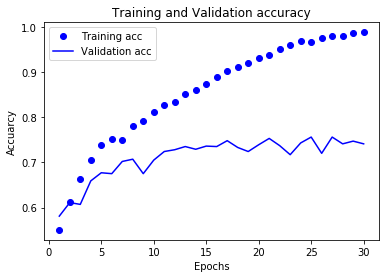

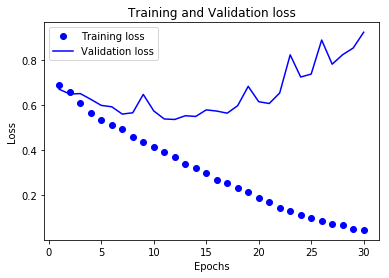

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc'] # Or acc
val_acc = history.history['val_acc'] # or val_acc
loss = history.history['loss'] # Or acc
val_loss = history.history['val_loss'] # or val_acc
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuarcy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

# Data Generator

### by resizing and rearranging certain image, we can increse the number of images

In [14]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, 
                             zoom_range=0.1, horizontal_flip=True, fill_mode = 'nearest')

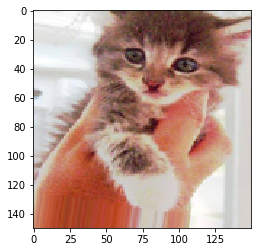

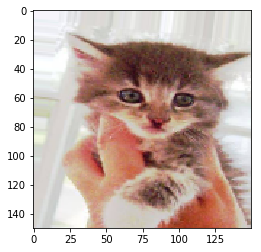

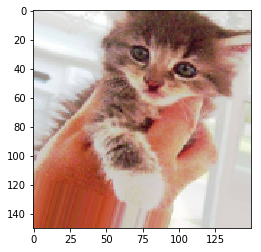

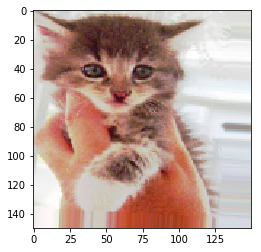

In [16]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 ==0:
        break

plt.show()

# Dropout model

In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=32, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=32, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, validation_data=validation_generator, validation_steps=50)
model.save('cats_and_dogs_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 24s 237ms/step - loss: 0.6954 - acc: 0.5044 - val_loss: 0.6862 - val_acc: 0.5051
Epoch 2/100
100/100 [==============================] - 23s 229ms/step - loss: 0.6842 - acc: 0.5547 - val_loss: 0.6941 - val_acc: 0.5193
Epoch 3/100
100/100 [==============================] - 23s 230ms/step - loss: 0.6740 - acc: 0.5866 - val_loss: 0.6459 - val_acc: 0.6510
Epoch 4/100
100/100 [==============================] - 23s 230ms/step - loss: 0.6577 - acc: 0.5969 - val_loss: 0.6262 - val_acc: 0.6405
Epoch 5/100
100/100 [==============================] - 22s 218ms/step - loss: 0.6411 - acc: 0.6359 - val_loss: 0.6070 - val_acc: 0.6694
Epoch 6/100
100/100 [==============================] - 22s 217ms/step - loss: 0.6337 - acc: 0.6434 - val_loss: 0.5863 - val_acc: 0.6830
Epoch 7/100
100/100 [==============================] - 22s 215ms/step - loss: 0.6114 - acc: 0.6656 -

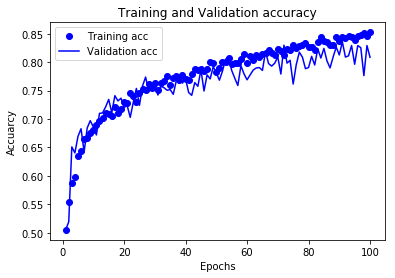

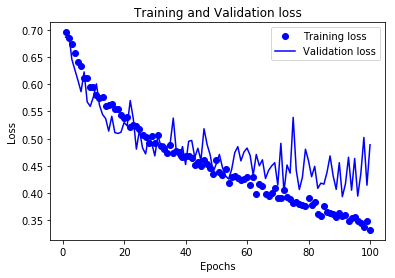

In [20]:
acc = history.history['acc'] # Or acc
val_acc = history.history['val_acc'] # or val_acc
loss = history.history['loss'] # Or acc
val_loss = history.history['val_loss'] # or val_acc
epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label = "Training acc")
plt.plot(epochs, val_acc, 'b', label = "Validation acc")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuarcy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = "Training loss")
plt.plot(epochs, val_loss, 'b', label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()